# 🔍 Notebook 02: Exploratory Data Analysis

**Predicting F1 Race Finishing Positions Using Practice & Qualifying Data**

This notebook explores the collected data to understand patterns, distributions, and correlations:

1. Feature matrix construction
2. Distribution of race positions
3. Qualifying vs Race position correlation
4. Team and driver performance trends
5. Feature correlations
6. Practice session predictive value

In [2]:
import sys, os, warnings
warnings.filterwarnings('ignore')
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

import config
from src.feature_engineering import build_feature_matrix, save_feature_matrix
from src.utils import (
    plot_qualifying_vs_race,
    plot_team_performance,
    plot_correlation_heatmap,
)

sns.set_theme(style='whitegrid', palette='deep')
%matplotlib inline

## 1. Build Feature Matrix

Combine all raw data into a single feature matrix for modeling.

In [3]:
# Build and save the feature matrix
df = build_feature_matrix(config.ALL_YEARS)
save_feature_matrix(df)

print(f"\nFeature matrix shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
display(df.head(10))


Building features for 2023...
  ✓ Practice features merged (467 rows)
  ✓ Qualifying features merged (440 rows)
  ✓ Weather features merged
  → 440 driver-race entries for 2023

Building features for 2024...
  ✓ Practice features merged (503 rows)
  ✓ Qualifying features merged (479 rows)
  ✓ Weather features merged
  → 479 driver-race entries for 2024

Building features for 2025...
  ✓ Practice features merged (520 rows)
  ✓ Qualifying features merged (480 rows)
  ✓ Weather features merged
  → 479 driver-race entries for 2025
  ✓ Rolling features computed

✅ Feature matrix complete: 1397 rows × 25 columns
   Features: ['grid_position', 'is_street_circuit', 'fp_best_lap', 'fp2_long_run_avg', 'fp_consistency', 'fp_avg_speed_i1', 'fp_avg_speed_i2', 'fp_avg_speed_st', 'quali_best_time', 'quali_gap_to_pole', 'track_temp_avg', 'rainfall', 'driver_recent_avg_pos', 'team_recent_avg_pos', 'team_encoded', 'driver_encoded', 'circuit_encoded']
Saved feature matrix to /Users/t.joongpiriyapong/Doc

,Year,RoundNumber,EventName,Driver,Team,DriverNumber,race_position,grid_position,circuit_key,is_street_circuit,...,fp_avg_speed_st,quali_best_time,quali_gap_to_pole,track_temp_avg,rainfall,driver_recent_avg_pos,team_recent_avg_pos,team_encoded,driver_encoded,circuit_encoded
0,2023,1,Bahrain Grand Prix,VER,Red Bull Racing,1,1.0,1.0,Sakhir,0,...,280.809524,89.708,0.000,31.011801,0,NaN,NaN,11,26,16
1,2023,1,Bahrain Grand Prix,PER,Red Bull Racing,11,2.0,2.0,Sakhir,0,...,278.227273,89.846,0.138,31.011801,0,NaN,NaN,11,18,16
2,2023,1,Bahrain Grand Prix,ALO,Aston Martin,14,3.0,5.0,Sakhir,0,...,278.900000,90.336,0.628,31.011801,0,NaN,NaN,3,1,16
3,2023,1,Bahrain Grand Prix,SAI,Ferrari,55,4.0,4.0,Sakhir,0,...,283.277778,90.154,0.446,31.011801,0,NaN,NaN,4,22,16
4,2023,1,Bahrain Grand Prix,HAM,Mercedes,44,5.0,7.0,Sakhir,0,...,289.166667,90.384,0.676,31.011801,0,NaN,NaN,8,11,16
5,2023,1,Bahrain Grand Prix,STR,Aston Martin,18,6.0,8.0,Sakhir,0,...,272.224490,90.836,1.128,31.011801,0,NaN,NaN,3,24,16
6,2023,1,Bahrain Grand Prix,RUS,Mercedes,63,7.0,6.0,Sakhir,0,...,278.647059,90.340,0.632,31.011801,0,NaN,NaN,8,21,16
7,2023,1,Bahrain Grand Prix,BOT,Alfa Romeo,77,8.0,12.0,Sakhir,0,...,263.319149,91.443,1.735,31.011801,0,NaN,NaN,0,5,16
8,2023,1,Bahrain Grand Prix,GAS,Alpine,10,9.0,20.0,Sakhir,0,...,291.833333,92.181,2.473,31.011801,0,NaN,NaN,2,9,16
9,2023,1,Bahrain Grand Prix,ALB,Williams,23,10.0,15.0,Sakhir,0,...,286.456522,91.461,1.753,31.011801,0,NaN,NaN,12,0,16


In [4]:
# Data types and missing values
print("\n── Data Types & Missing Values ──")
info_df = pd.DataFrame({
    'dtype': df.dtypes,
    'non_null': df.count(),
    'null_count': df.isnull().sum(),
    'null_pct': (df.isnull().sum() / len(df) * 100).round(1)
})
display(info_df)


── Data Types & Missing Values ──


,dtype,non_null,null_count,null_pct
Year,int64,1397,0,0.0
RoundNumber,int64,1397,0,0.0
EventName,object,1397,0,0.0
Driver,object,1397,0,0.0
Team,object,1397,0,0.0
DriverNumber,object,1397,0,0.0
race_position,float64,1397,0,0.0
grid_position,float64,1397,0,0.0
circuit_key,object,1397,0,0.0
is_street_circuit,int64,1397,0,0.0


In [5]:
# Descriptive statistics
print("\n── Descriptive Statistics ──")
display(df.describe().round(2))


── Descriptive Statistics ──


,Year,RoundNumber,race_position,grid_position,is_street_circuit,fp_best_lap,fp2_long_run_avg,fp_consistency,fp_avg_speed_i1,fp_avg_speed_i2,fp_avg_speed_st,quali_best_time,quali_gap_to_pole,track_temp_avg,rainfall,driver_recent_avg_pos,team_recent_avg_pos,team_encoded,driver_encoded
count,1397.00,1397.00,1397.00,1397.00,1397.00,1395.00,935.00,1389.00,1395.00,1395.00,1395.00,1382.00,1382.00,1397.00,1397.00,1369.00,1371.00,1397.00,1397.00
mean,2024.03,12.19,10.48,10.44,0.26,84.36,98.03,18.44,236.35,230.43,276.87,84.21,1.35,35.38,0.23,10.43,10.46,6.29,14.75
std,0.81,6.77,5.76,5.76,0.44,11.35,9.92,3.61,36.78,37.47,16.93,11.34,2.05,8.81,0.42,4.65,4.12,3.50,8.09
min,2023.00,1.00,1.00,0.00,0.00,64.32,70.73,0.74,149.58,146.50,213.00,63.97,0.00,17.72,0.00,1.00,1.50,0.00,0.00
25%,2023.00,6.00,5.00,5.00,0.00,74.85,89.67,16.27,206.51,199.73,266.87,75.68,0.50,29.79,0.00,7.00,7.00,3.00,9.00
50%,2024.00,12.00,10.00,10.00,0.00,84.04,97.60,18.60,244.95,237.68,277.70,83.80,0.96,35.60,0.00,11.33,11.00,6.00,16.00
75%,2025.00,18.00,15.00,15.00,1.00,91.48,106.05,20.95,263.20,258.77,287.68,90.79,1.58,42.93,0.00,14.00,13.83,9.00,22.00
max,2025.00,24.00,20.00,20.00,1.00,141.95,126.58,29.29,327.08,307.27,321.17,128.51,40.24,50.59,1.00,20.00,18.50,12.00,27.00


## 2. Distribution Analysis

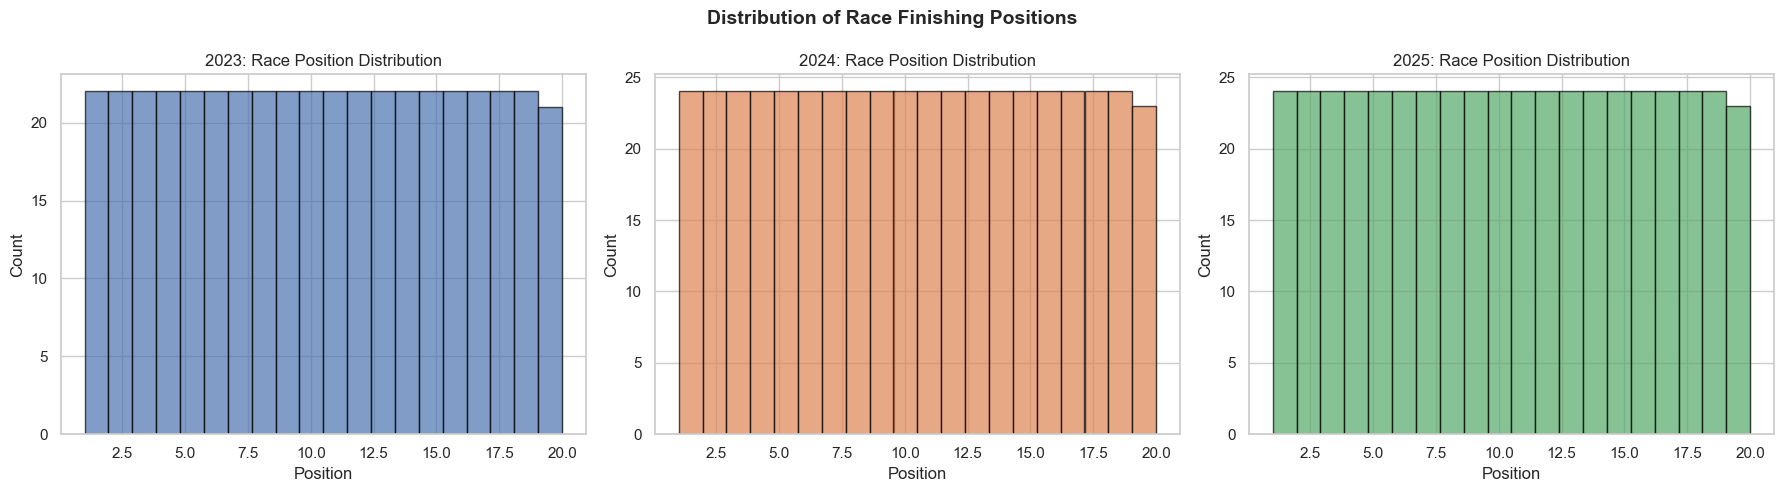

In [6]:
# Distribution of race positions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, year in enumerate(config.ALL_YEARS):
    year_data = df[df['Year'] == year]
    axes[i].hist(year_data['race_position'], bins=20, edgecolor='black', 
                 alpha=0.7, color=sns.color_palette()[i])
    axes[i].set_title(f'{year}: Race Position Distribution')
    axes[i].set_xlabel('Position')
    axes[i].set_ylabel('Count')

plt.suptitle('Distribution of Race Finishing Positions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# Samples per year
print("\n── Samples per Year ──")
year_counts = df.groupby('Year').agg(
    Races=('RoundNumber', 'nunique'),
    Drivers=('Driver', 'nunique'),
    Samples=('race_position', 'count')
)
display(year_counts)


── Samples per Year ──


,Races,Drivers,Samples
Year,,,
2023,22,22,439
2024,24,24,479
2025,24,21,479


## 3. Qualifying vs Race Position

How well does qualifying position predict race outcome?

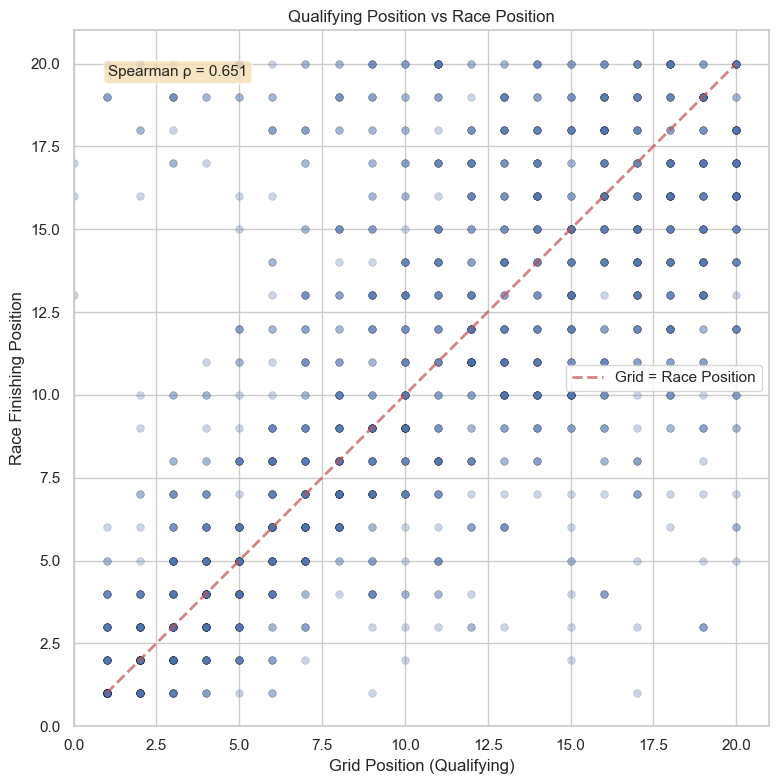


── Qualifying-Race Correlation by Year ──
  2023: Spearman ρ = 0.567 (p = 0.000000)
  2024: Spearman ρ = 0.728 (p = 0.000000)
  2025: Spearman ρ = 0.652 (p = 0.000000)


In [8]:
# Qualifying vs Race Position scatter
if 'grid_position' in df.columns:
    fig = plot_qualifying_vs_race(df.dropna(subset=['grid_position', 'race_position']))
    plt.show()
    
    # Per-year correlation
    print("\n── Qualifying-Race Correlation by Year ──")
    for year in config.ALL_YEARS:
        year_data = df[df['Year'] == year].dropna(subset=['grid_position', 'race_position'])
        rho, p = spearmanr(year_data['grid_position'], year_data['race_position'])
        print(f"  {year}: Spearman ρ = {rho:.3f} (p = {p:.6f})")
else:
    print("⚠ grid_position not available")

## 4. Team Performance

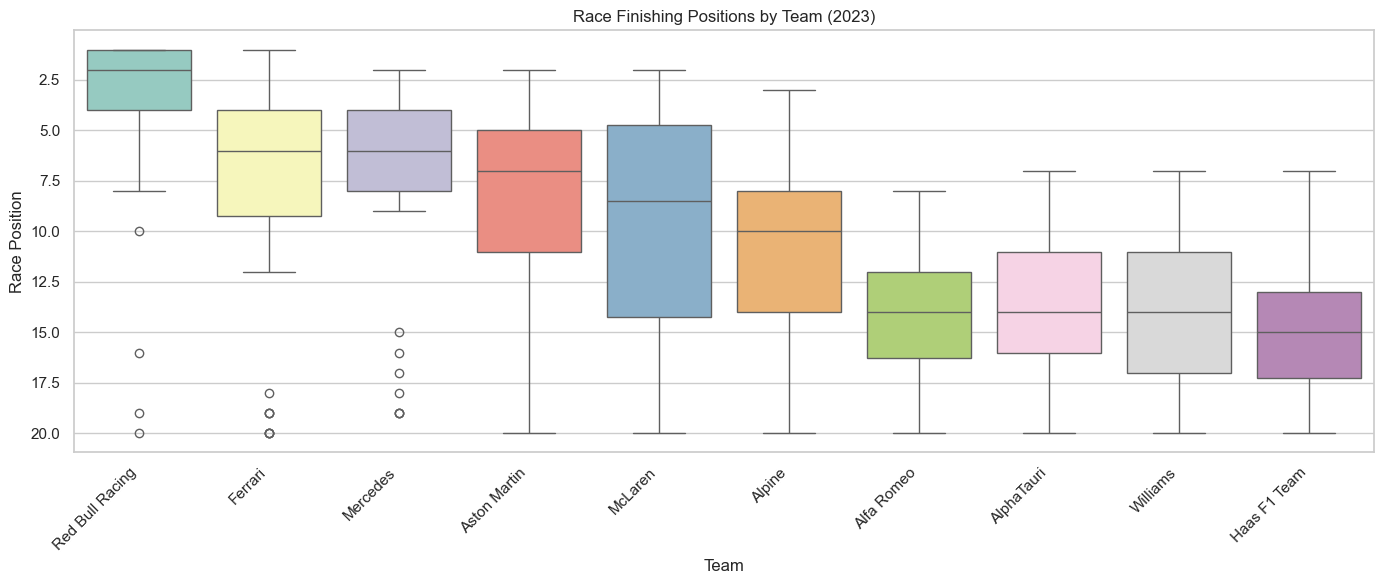

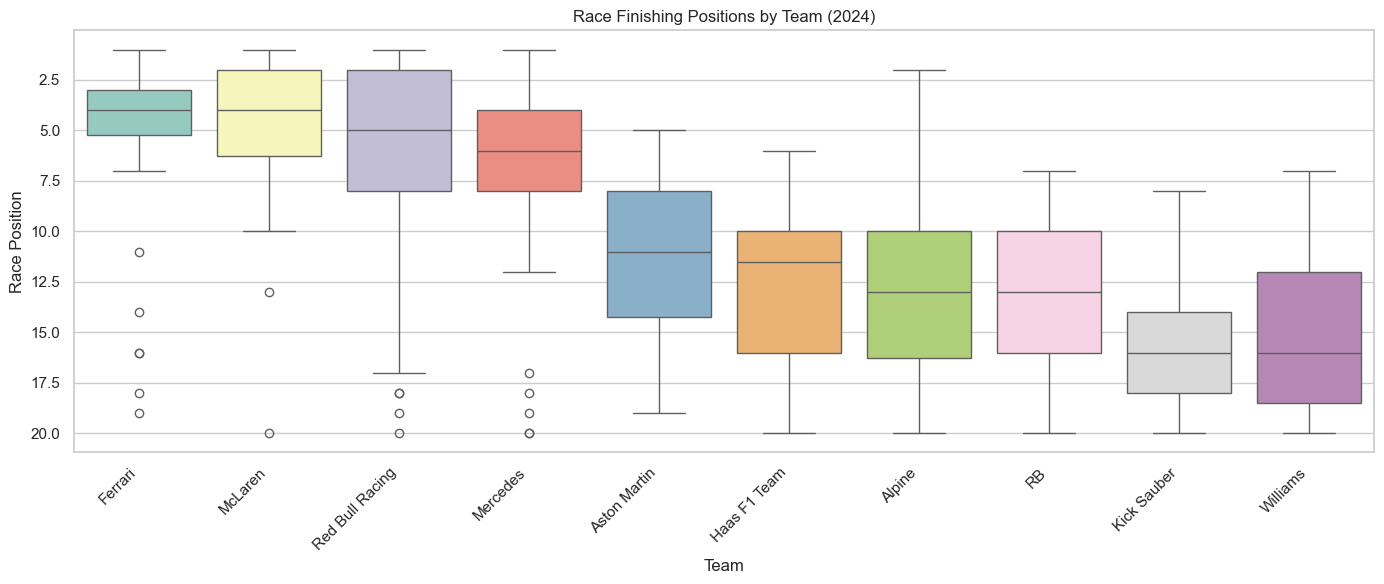

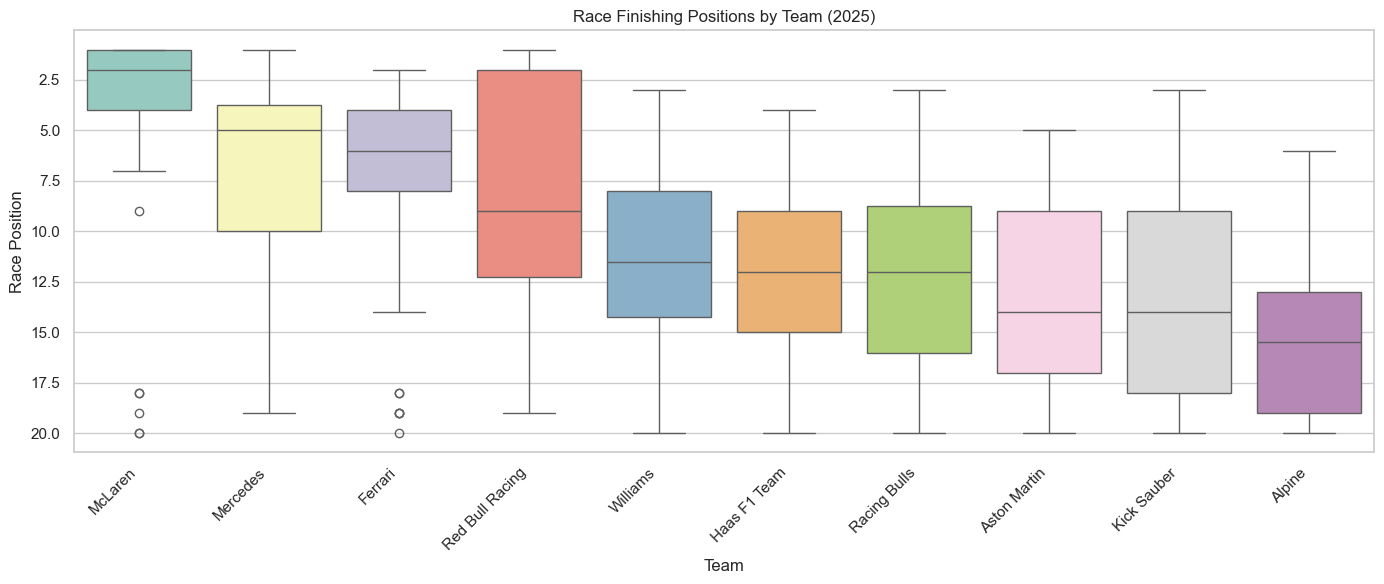

In [9]:
# Team performance box plots per year
for year in config.ALL_YEARS:
    if 'Team' in df.columns:
        fig = plot_team_performance(df, year=year)
        plt.show()

In [10]:
# Average finishing position by team per year
if 'Team' in df.columns:
    team_avg = (
        df.groupby(['Year', 'Team'])['race_position']
        .mean()
        .reset_index()
        .pivot(index='Team', columns='Year', values='race_position')
        .round(1)
    )
    team_avg = team_avg.sort_values(team_avg.columns[-1])
    print("\n── Average Finishing Position by Team ──")
    display(team_avg)


── Average Finishing Position by Team ──


Year,2023,2024,2025
Team,,,
McLaren,9.5,4.7,4.2
Mercedes,7.1,6.9,7.2
Ferrari,7.9,5.1,7.6
Red Bull Racing,3.6,6.6,8.1
Williams,14.1,15.1,11.6
Haas F1 Team,15.1,12.4,12.1
Racing Bulls,NaN,NaN,12.3
Aston Martin,8.7,11.8,12.8
Kick Sauber,NaN,15.7,13.5


## 5. Feature Correlations

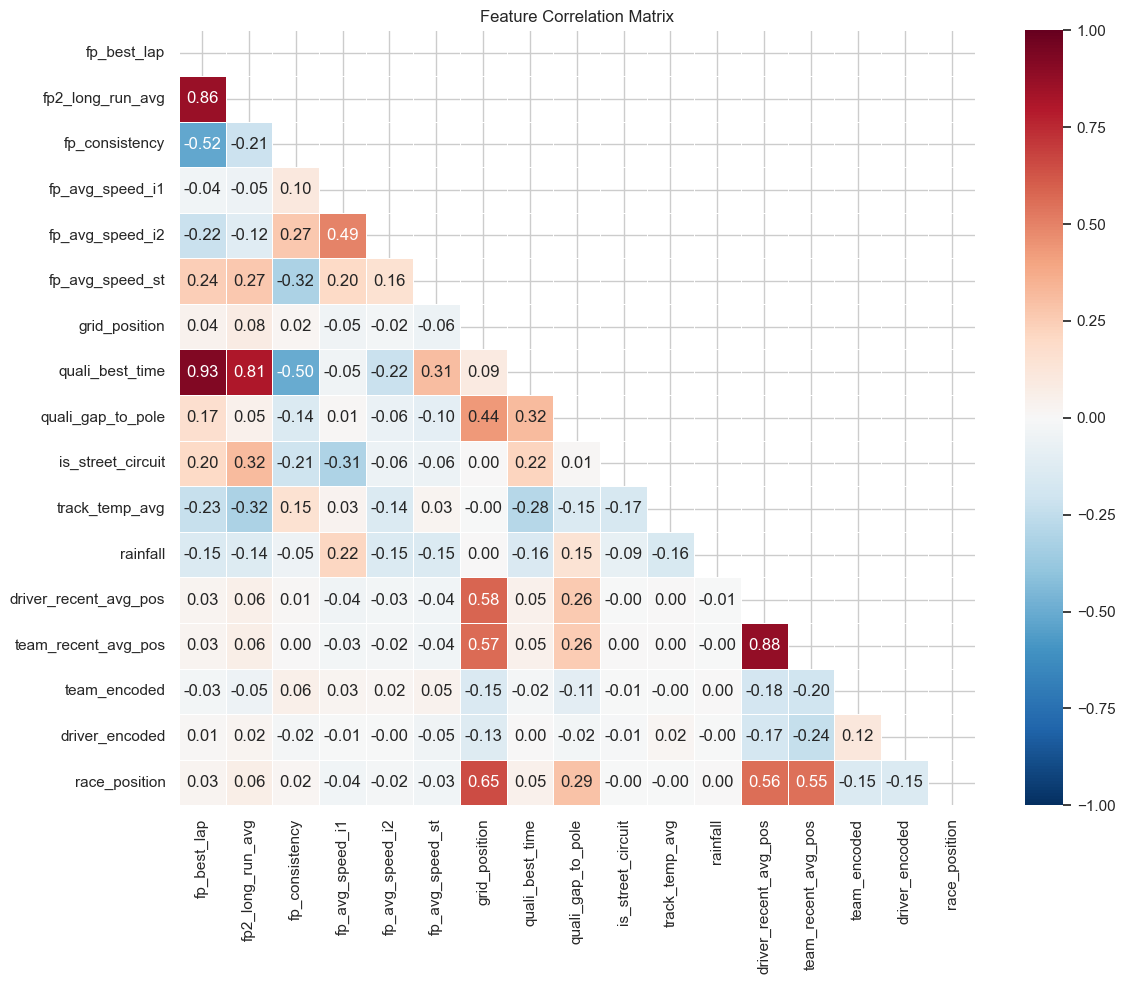

In [11]:
# Feature correlation heatmap
numeric_features = [c for c in config.ALL_FEATURES if c in df.columns and df[c].dtype in ['float64', 'int64']]
fig = plot_correlation_heatmap(df, numeric_features)
plt.show()

In [12]:
# Individual feature correlations with target
print("\n── Feature Correlations with Race Position ──")
feature_corrs = []
for feat in numeric_features:
    valid = df[[feat, 'race_position']].dropna()
    if len(valid) > 10:
        rho, p = spearmanr(valid[feat], valid['race_position'])
        feature_corrs.append({'Feature': feat, 'Spearman ρ': rho, 'p-value': p})

corr_df = pd.DataFrame(feature_corrs).sort_values('Spearman ρ', key=abs, ascending=False)
display(corr_df)


── Feature Correlations with Race Position ──


,Feature,Spearman ρ,p-value
6,grid_position,0.651485,1.522219e-169
8,quali_gap_to_pole,0.622657,3.483117e-149
12,driver_recent_avg_pos,0.550532,2.544989e-109
13,team_recent_avg_pos,0.545624,3.453411e-107
14,team_encoded,-0.153405,8.276032e-09
15,driver_encoded,-0.143070,7.860755e-08
7,quali_best_time,0.062803,1.954852e-02
1,fp2_long_run_avg,0.056863,8.224428e-02
3,fp_avg_speed_i1,-0.044569,9.611548e-02
5,fp_avg_speed_st,-0.039070,1.446985e-01


## 6. Practice Session Value

How much added predictive value do practice sessions provide beyond qualifying?

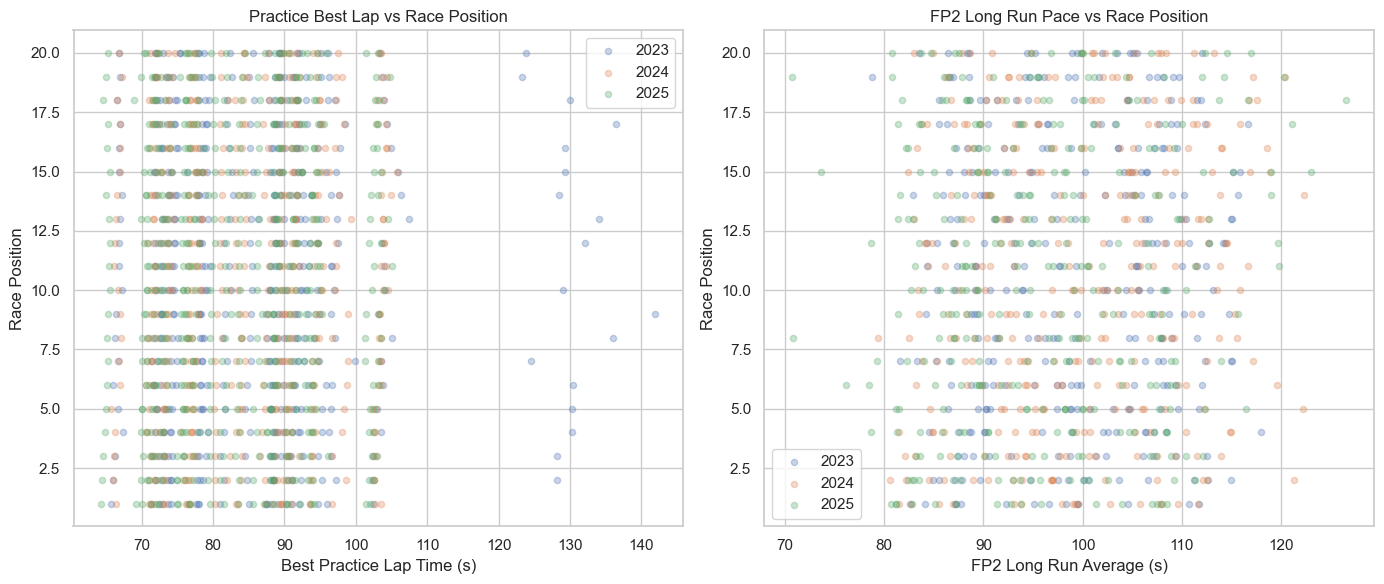

In [13]:
# Best practice lap vs race position
if 'fp_best_lap' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Practice best lap vs Race position (per race, normalized)
    for year in config.ALL_YEARS:
        yd = df[df['Year'] == year].dropna(subset=['fp_best_lap', 'race_position'])
        axes[0].scatter(yd['fp_best_lap'], yd['race_position'], 
                       alpha=0.3, label=str(year), s=20)
    axes[0].set_xlabel('Best Practice Lap Time (s)')
    axes[0].set_ylabel('Race Position')
    axes[0].set_title('Practice Best Lap vs Race Position')
    axes[0].legend()
    
    # Long run pace vs Race position
    if 'fp2_long_run_avg' in df.columns:
        for year in config.ALL_YEARS:
            yd = df[df['Year'] == year].dropna(subset=['fp2_long_run_avg', 'race_position'])
            axes[1].scatter(yd['fp2_long_run_avg'], yd['race_position'], 
                           alpha=0.3, label=str(year), s=20)
        axes[1].set_xlabel('FP2 Long Run Average (s)')
        axes[1].set_ylabel('Race Position')
        axes[1].set_title('FP2 Long Run Pace vs Race Position')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Practice features not available")

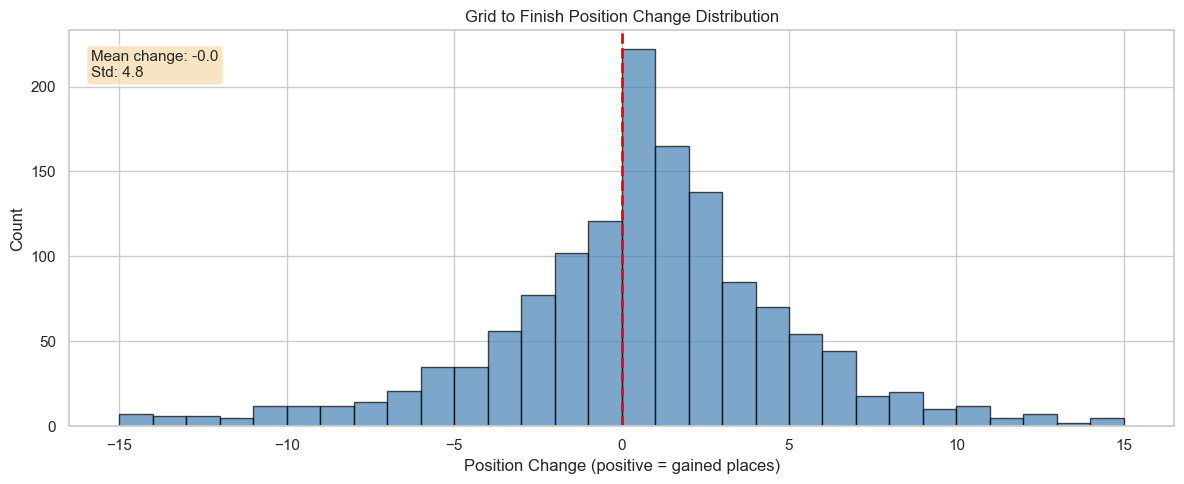


── Biggest Position Gains ──


,Year,EventName,Driver,Team,grid_position,race_position,position_change
838,2024,São Paulo Grand Prix,VER,Red Bull Racing,17.0,1.0,16.0
900,2024,Abu Dhabi Grand Prix,LEC,Ferrari,19.0,3.0,16.0
1139,2025,British Grand Prix,HUL,Kick Sauber,19.0,3.0,16.0
1319,2025,São Paulo Grand Prix,VER,Red Bull Racing,19.0,3.0,16.0
44,2023,Australian Grand Prix,PER,Red Bull Racing,20.0,5.0,15.0



── Biggest Position Losses ──


,Year,EventName,Driver,Team,grid_position,race_position,position_change
358,2023,United States Grand Prix,LEC,Ferrari,1.0,20.0,-19.0
398,2023,São Paulo Grand Prix,LEC,Ferrari,2.0,20.0,-18.0
497,2024,Australian Grand Prix,VER,Red Bull Racing,1.0,19.0,-18.0
657,2024,Austrian Grand Prix,NOR,McLaren,2.0,20.0,-18.0
676,2024,British Grand Prix,RUS,Mercedes,1.0,19.0,-18.0


In [14]:
# Position changes from grid to finish
if 'grid_position' in df.columns:
    df_temp = df.dropna(subset=['grid_position', 'race_position']).copy()
    df_temp['position_change'] = df_temp['grid_position'] - df_temp['race_position']
    
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.hist(df_temp['position_change'], bins=range(-15, 16), 
            edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Position Change (positive = gained places)')
    ax.set_ylabel('Count')
    ax.set_title('Grid to Finish Position Change Distribution')
    ax.text(0.02, 0.95, f'Mean change: {df_temp["position_change"].mean():.1f}\n'
            f'Std: {df_temp["position_change"].std():.1f}',
            transform=ax.transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout()
    plt.show()
    
    # Biggest position changes
    print("\n── Biggest Position Gains ──")
    display(df_temp.nlargest(5, 'position_change')[['Year', 'EventName', 'Driver', 'Team', 'grid_position', 'race_position', 'position_change']])
    
    print("\n── Biggest Position Losses ──")
    display(df_temp.nsmallest(5, 'position_change')[['Year', 'EventName', 'Driver', 'Team', 'grid_position', 'race_position', 'position_change']])

## 7. Key EDA Takeaways

Summary of findings to inform model design.

In [15]:
print("\n" + "=" * 60)
print("📋 KEY EDA TAKEAWAYS")
print("=" * 60)
print(f"""\n
1. Dataset Size:
   - Training (2023-2024): {len(df[df['Year'].isin(config.TRAIN_YEARS)])} driver-race entries
   - Testing (2025): {len(df[df['Year'].isin(config.TEST_YEARS)])} driver-race entries

2. Feature Availability:
   - Available features: {[c for c in config.ALL_FEATURES if c in df.columns]}
   - Missing features: {[c for c in config.ALL_FEATURES if c not in df.columns]}
   - Missing value rate: {(df[config.ALL_FEATURES].isnull().sum().sum() / (len(df) * len([c for c in config.ALL_FEATURES if c in df.columns])) * 100):.1f}%

3. Ready for modeling in Notebook 03!
""")


📋 KEY EDA TAKEAWAYS


1. Dataset Size:
   - Training (2023-2024): 918 driver-race entries
   - Testing (2025): 479 driver-race entries

2. Feature Availability:
   - Available features: ['fp_best_lap', 'fp2_long_run_avg', 'fp_consistency', 'fp_avg_speed_i1', 'fp_avg_speed_i2', 'fp_avg_speed_st', 'grid_position', 'quali_best_time', 'quali_gap_to_pole', 'circuit_key', 'is_street_circuit', 'track_temp_avg', 'rainfall', 'driver_recent_avg_pos', 'team_recent_avg_pos', 'team_encoded', 'driver_encoded']
   - Missing features: []
   - Missing value rate: 2.4%

3. Ready for modeling in Notebook 03!

